<a href="https://colab.research.google.com/github/valeriazv/G3Patrones/blob/main/Challenges/Ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Ejercicio práctico | Visualización y pre-procesamiento de datos}$$



Autor: Emilio Ochoa

[Contexto] La visualización y el pre-procesamiento de datos es una de las etapas mas importantes dentro de la generación de algoritmos predictivos; sin un buen analisis exploratorio previo, muchas variables de interés pueden ser pasadas por alto; o peor aún, utilizar todas las variables pueden afectar al modelo en un futuro. Como analista de datos, se te solicita evaluar el siguiente dataset, referente al análisis de falla cardiaca en diversos pacientes:



Citacion: fedesoriano. (September 2021). Heart Failure Prediction Dataset. Recopilado de https://www.kaggle.com/fedesoriano/heart-failure-prediction.

# Carga de dataset y librerias

1)Carga las librerias que consideres pertinentes (matplotlib, sklearn, etc); posterior a eso carga el archivo heart.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importamos el archivo y visualizamos las primeras filas:
df_cancer = pd.read_csv("cancer_challenge_cl2.csv")

# Para eliminar la primera columna, pues su información es irrelevante:
df_cancer = df_cancer.drop(df_cancer.columns[0], axis=1)

df_cancer.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,-1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


# Análisis Exploratorio

2)Ingresa a la referencia citada y menciona las características (columnas) del dataset; haz un analisis exploratorio de la data, mencionando datos estadisticos que consideres a tu criterio.

In [ ]:
# Para obtener información básica del DataFrame y un breve análisis estadístico:
print(df_cancer.info())
df_cancer.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              567 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           564 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      562 non-null    float64
 8   mean symmetry            566 non-null    float64
 9   mean fractal dimension   561 non-null    float64
 10  radius error             564 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,567.000000,569.000000,564.000000,569.000000,569.000000,569.000000,569.000000,562.000000,566.000000,561.000000,...,569.000000,564.000000,569.000000,566.000000,569.000000,564.000000,565.000000,563.000000,562.000000,563.000000
mean,15.293573,19.434938,92.199947,650.421265,0.245386,0.104341,0.088799,0.191178,0.281227,0.142858,...,25.603146,107.377819,880.583128,0.132362,2.844961,0.273048,0.135599,0.290270,0.084044,0.632327
std,27.600997,5.445044,24.280344,359.317697,2.516184,0.052813,0.079720,3.372755,1.713647,1.897265,...,6.436019,33.722701,569.356993,0.022869,39.677091,0.209031,0.504349,0.062084,0.018120,0.518161
min,6.981000,9.710000,43.790000,-1001.000000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,-20.000000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.710000,16.170000,75.412500,418.700000,0.086370,0.064920,0.029560,0.020362,0.161925,0.057690,...,21.060000,84.102500,515.300000,0.116600,0.147700,0.115925,0.064130,0.250450,0.071827,0.000000
50%,13.400000,18.870000,86.545000,546.300000,0.095920,0.092630,0.061540,0.033600,0.179350,0.061480,...,25.410000,97.745000,686.500000,0.131300,0.215600,0.227450,0.099750,0.282300,0.080075,1.000000
75%,15.935000,21.810000,104.400000,782.600000,0.105400,0.130400,0.130700,0.074030,0.195700,0.066080,...,29.720000,126.000000,1084.000000,0.146000,0.341600,0.385300,0.162500,0.318150,0.092105,1.000000
max,666.000000,99.000000,188.500000,2501.000000,45.000000,0.345400,0.426800,80.000000,34.000000,45.000000,...,49.540000,251.200000,4254.000000,0.222600,666.000000,1.252000,12.000000,0.663800,0.207500,5.000000


3) Evalua si la data esta balanceada para el target propuesto. Comenta tus resultados

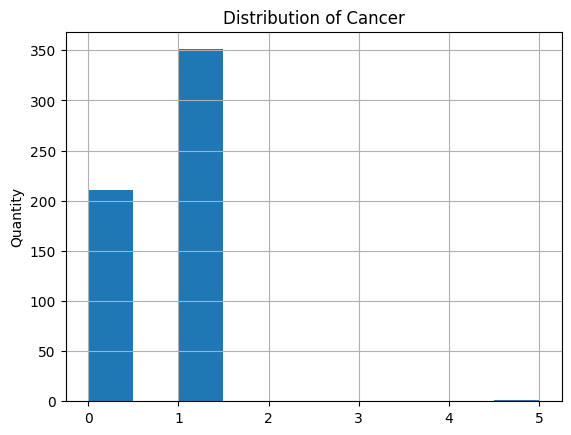

In [ ]:
# Comparación entre la cantidad de personas que padecen de cáncer y las que no
plt.hist(df_cancer['target'])
plt.title(('Distribution of ' +  'Cancer'))
plt.grid()
plt.ylabel("Quantity")
plt.show()

# Visualización de la data

4) Muestra con gráficos lo siguiente: \\

*  Distribución de las variable
*  Relación entre las variables
*  Outliers en las variables

Adicional a esto, añadir un gráfico que consideres pertinente para el análisis.

In [ ]:
# Separamos la información de las personas que sí padecen de cáncer:
patients = df_cancer[df_cancer['target'] == 1]

In [ ]:
# Extraer la primera fila como etiquetas para facilitar el manejo de gráficos:
titles = df_cancer.columns.tolist()
titles.pop() # Eliminamos el último elemento, pues no evaluaremos el target
print(titles)

['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


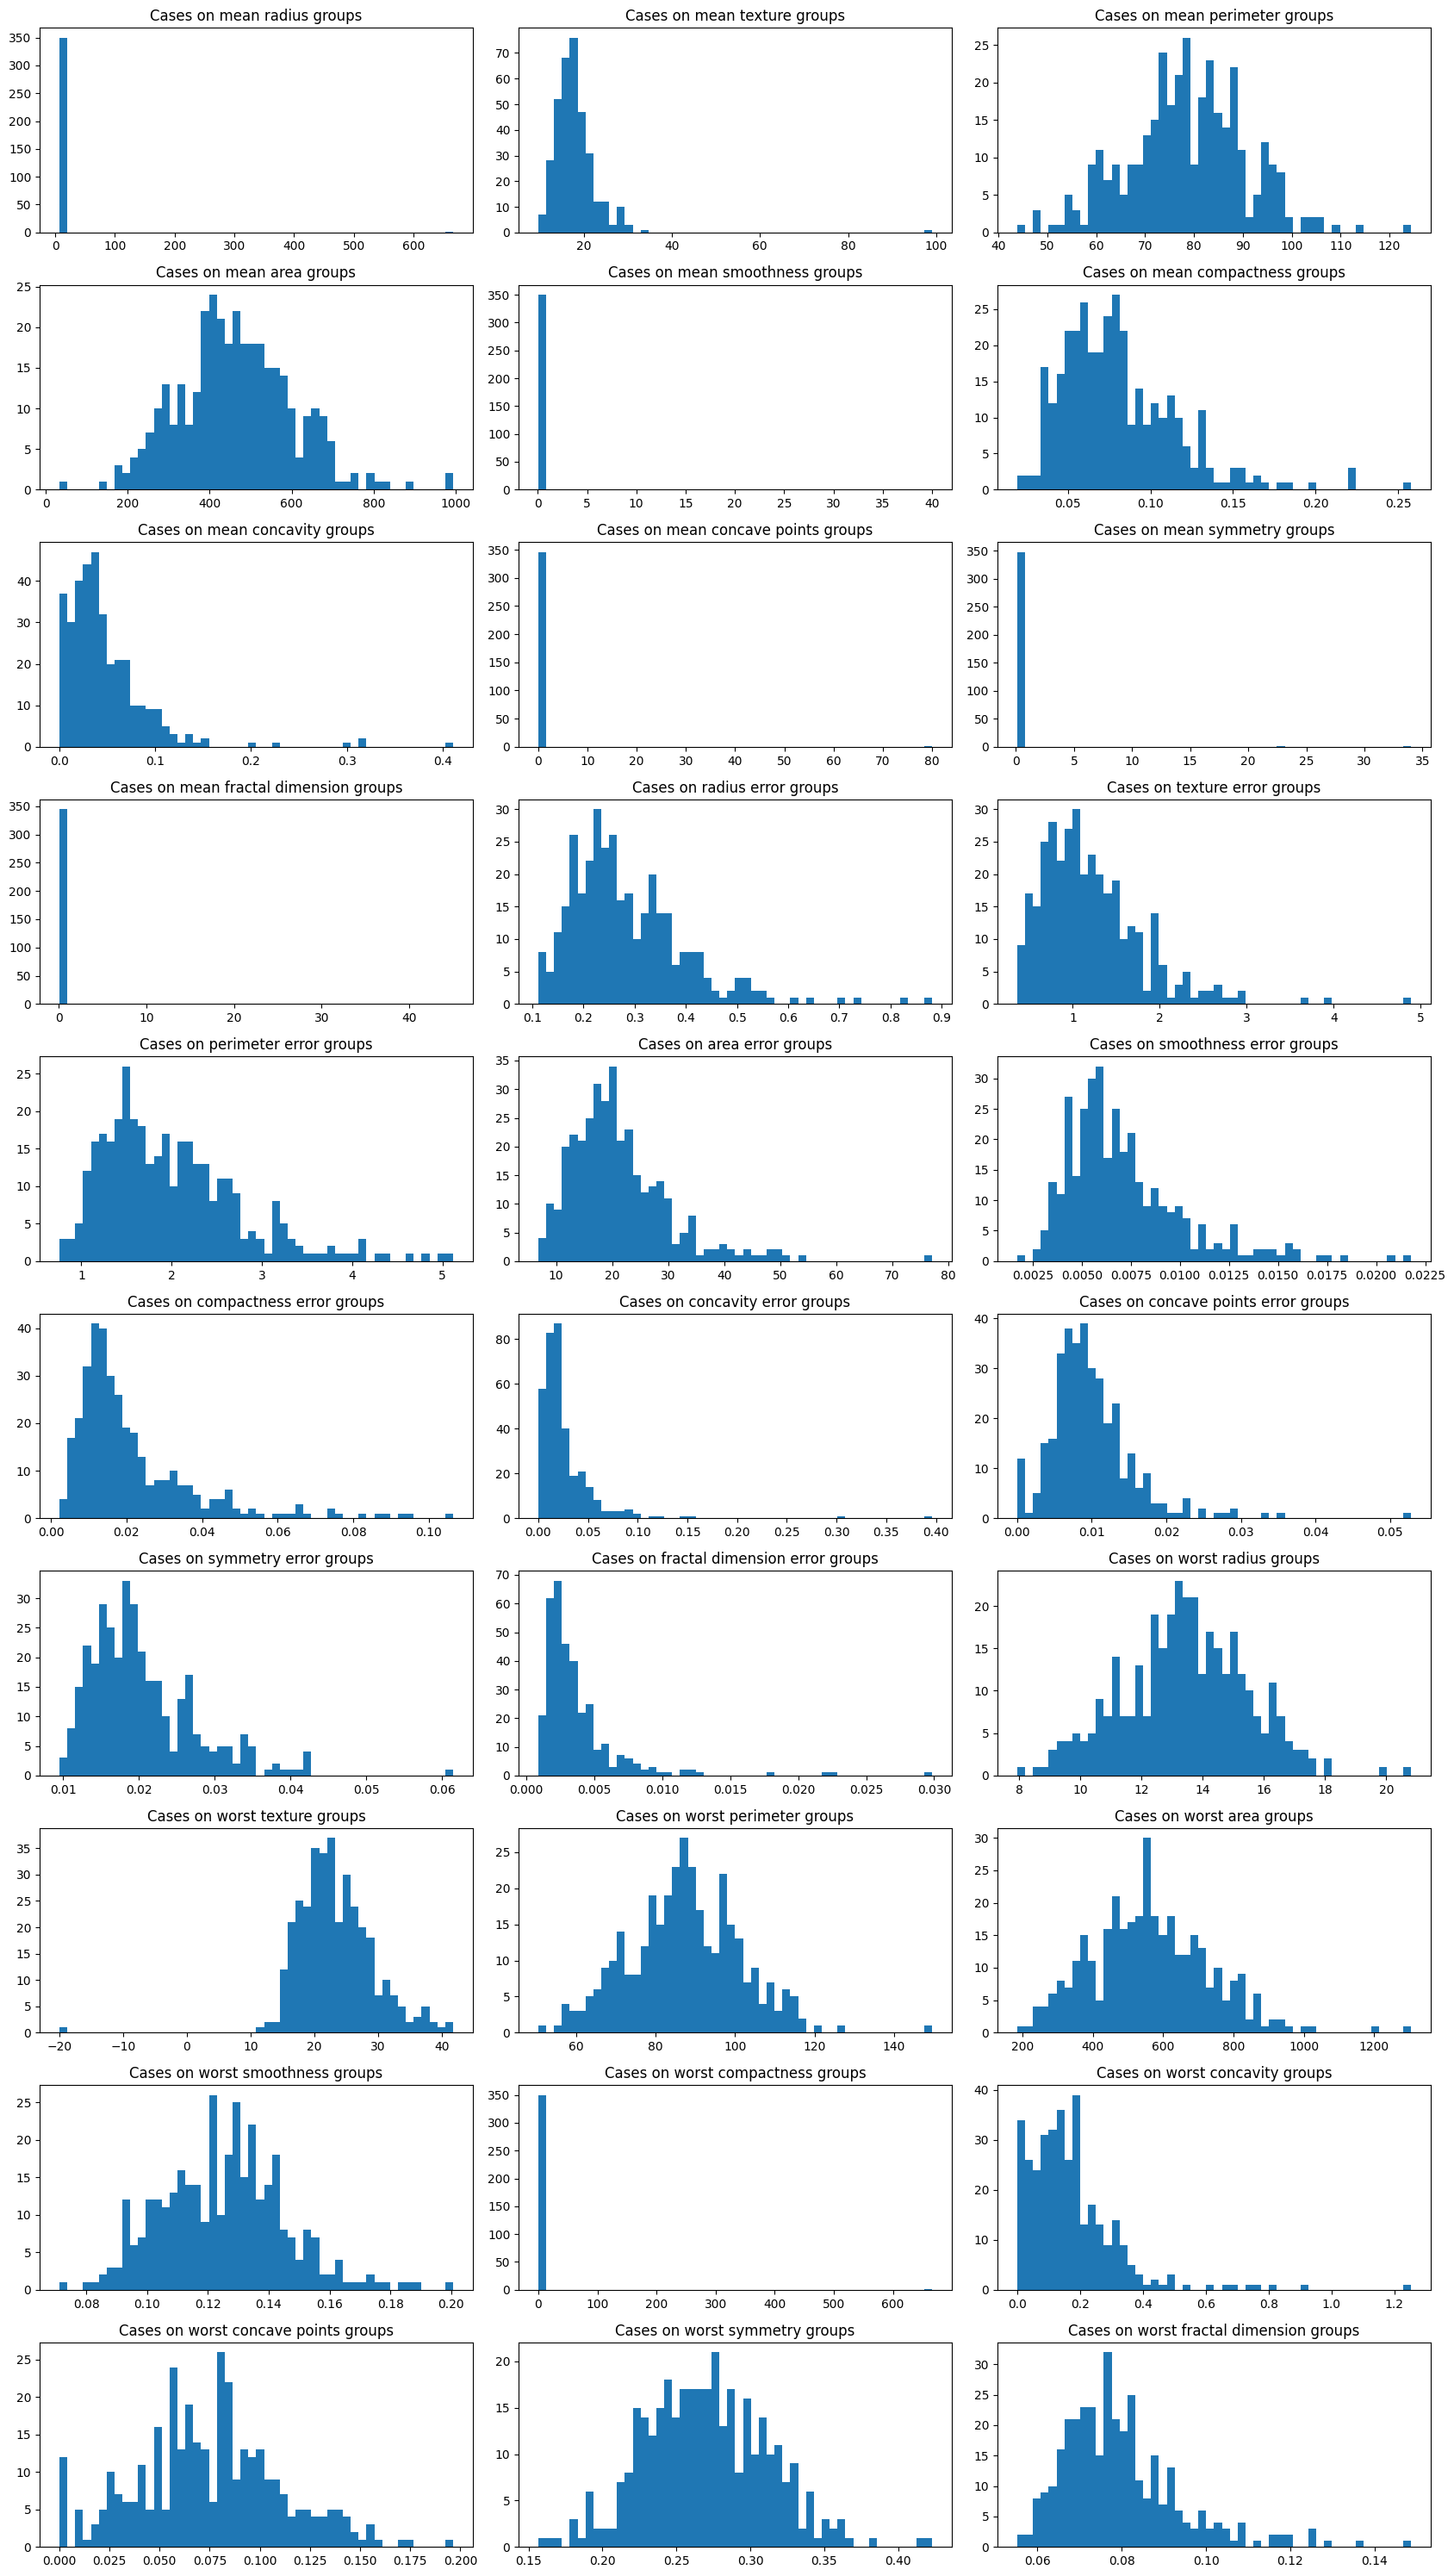

In [ ]:
# Ploteo de un histograma para cada una de las características
plt.figure(figsize=(17,30))
count = 1
for feature in titles:
    plt.subplot(10, 3, count)
    plt.hist(patients[feature], bins=50)
    plt.title(('Cases on ' +  feature + ' groups'))
    # plt.grid()
    count += 1

plt.tight_layout()
plt.show()

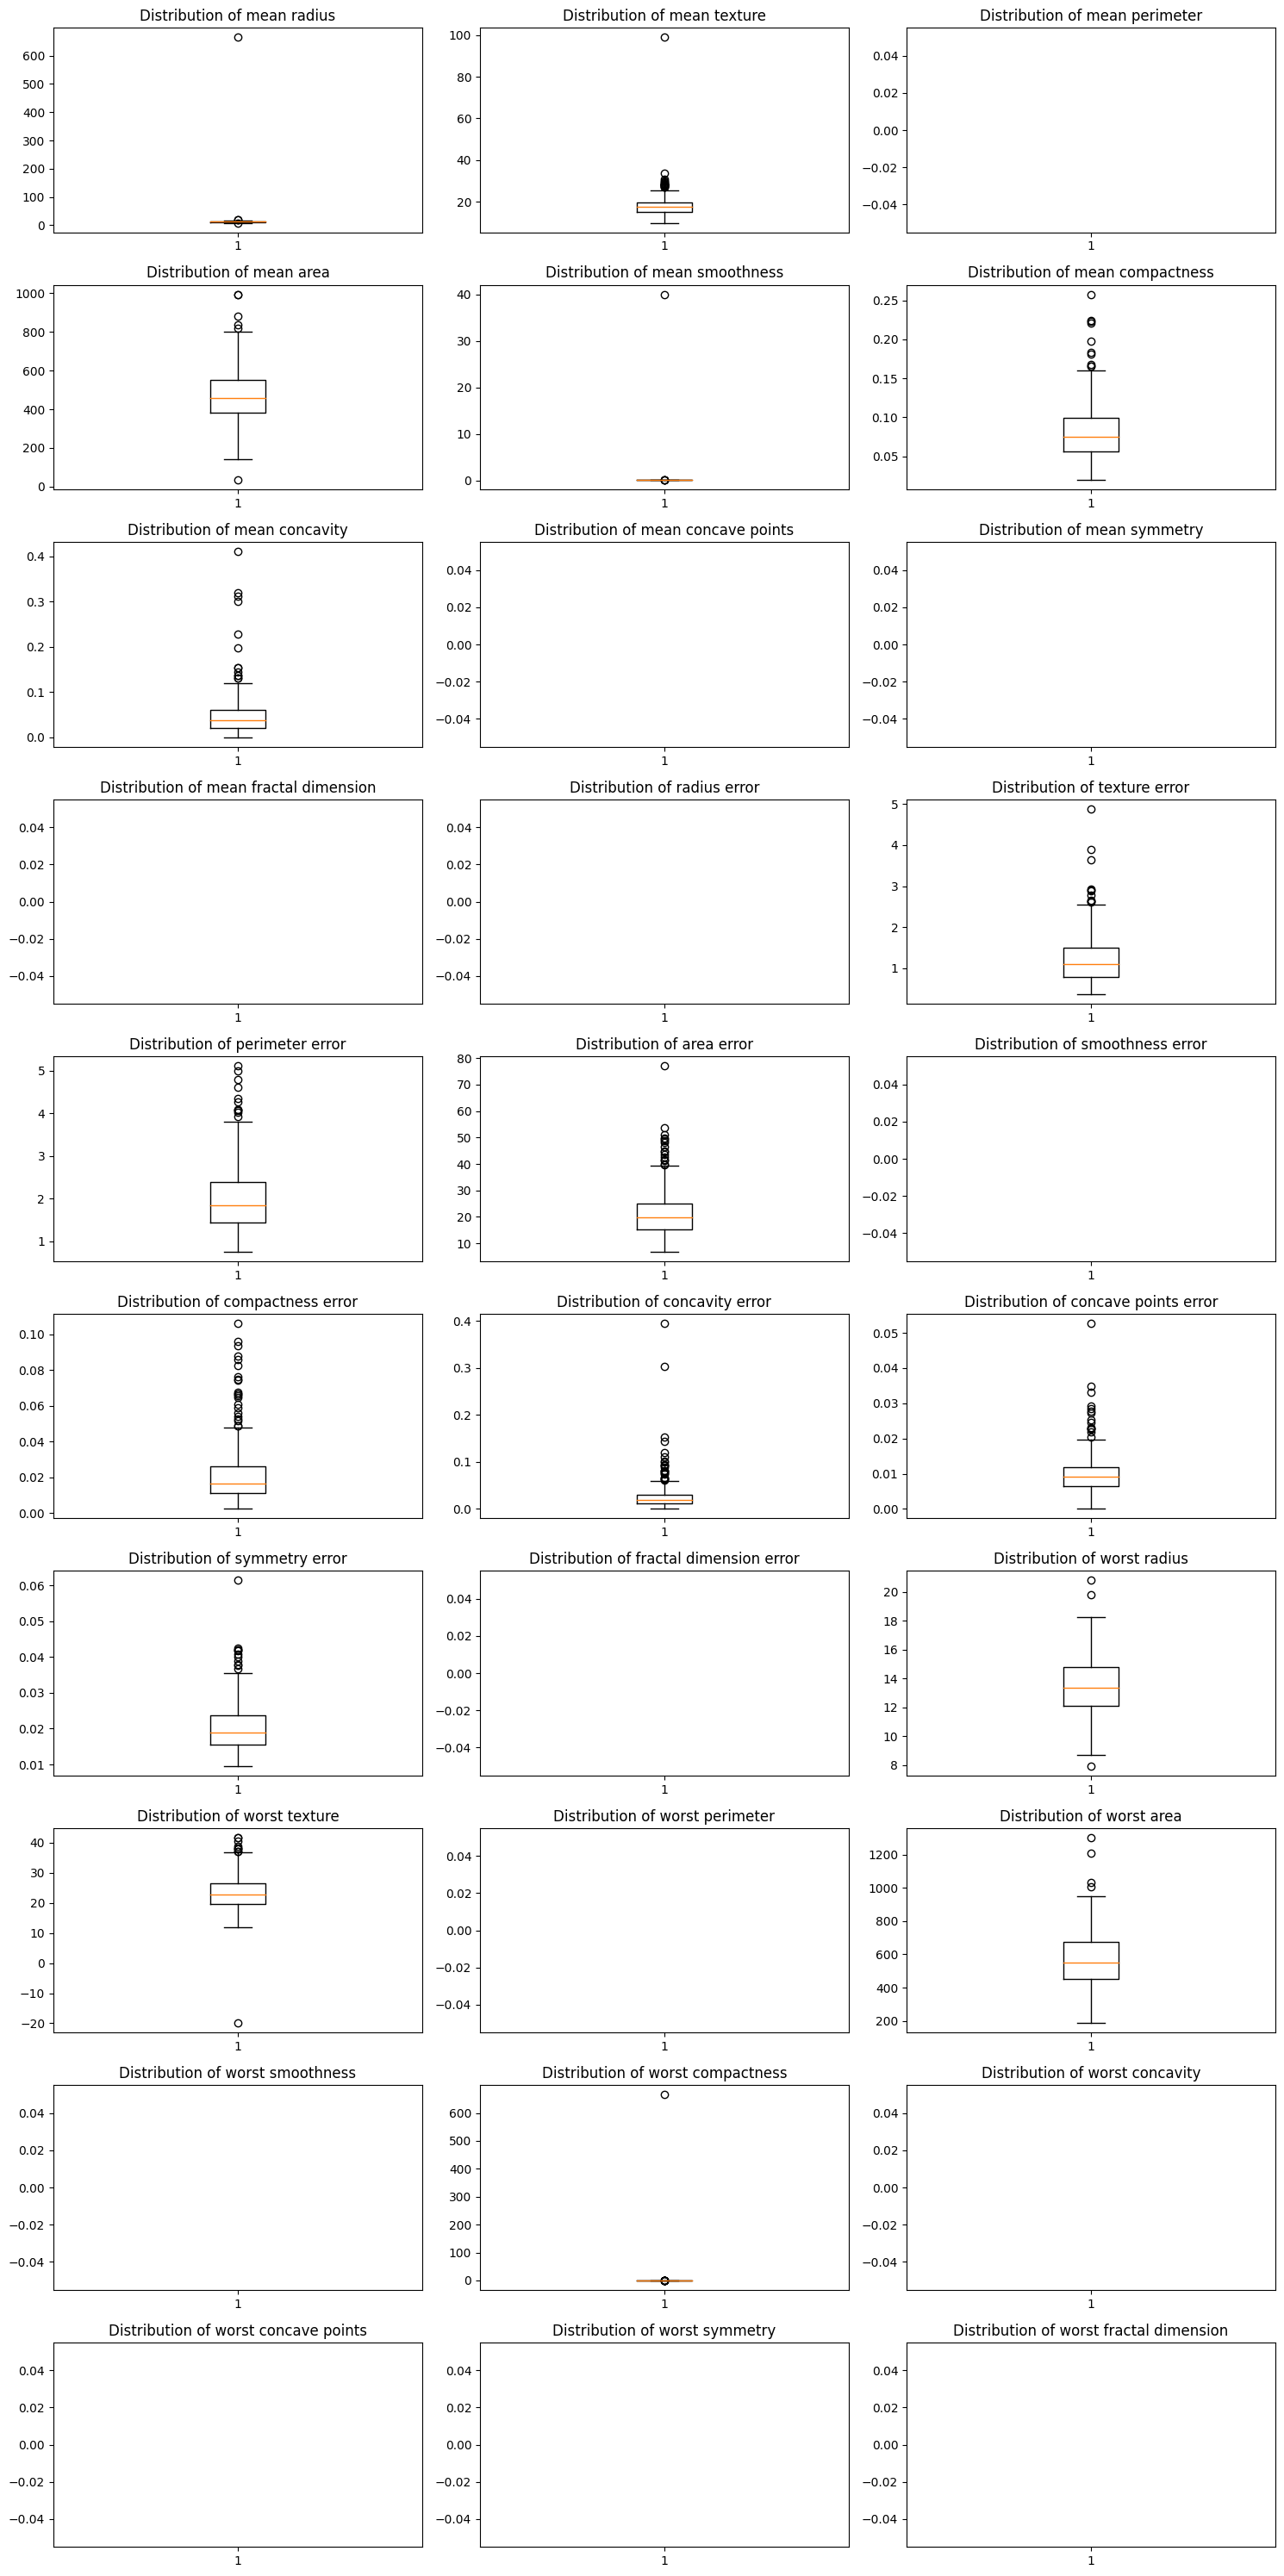

In [ ]:
# Ploteo de diagramas de caja y bigotes, incluyendo los casos atípicos
plt.figure(figsize=(15,30))
count = 1
for feature in titles:
    plt.subplot(10, 3, count)
    plt.boxplot(patients[feature])
    plt.title(('Distribution of ' + feature))
    count += 1

plt.tight_layout()
plt.show()

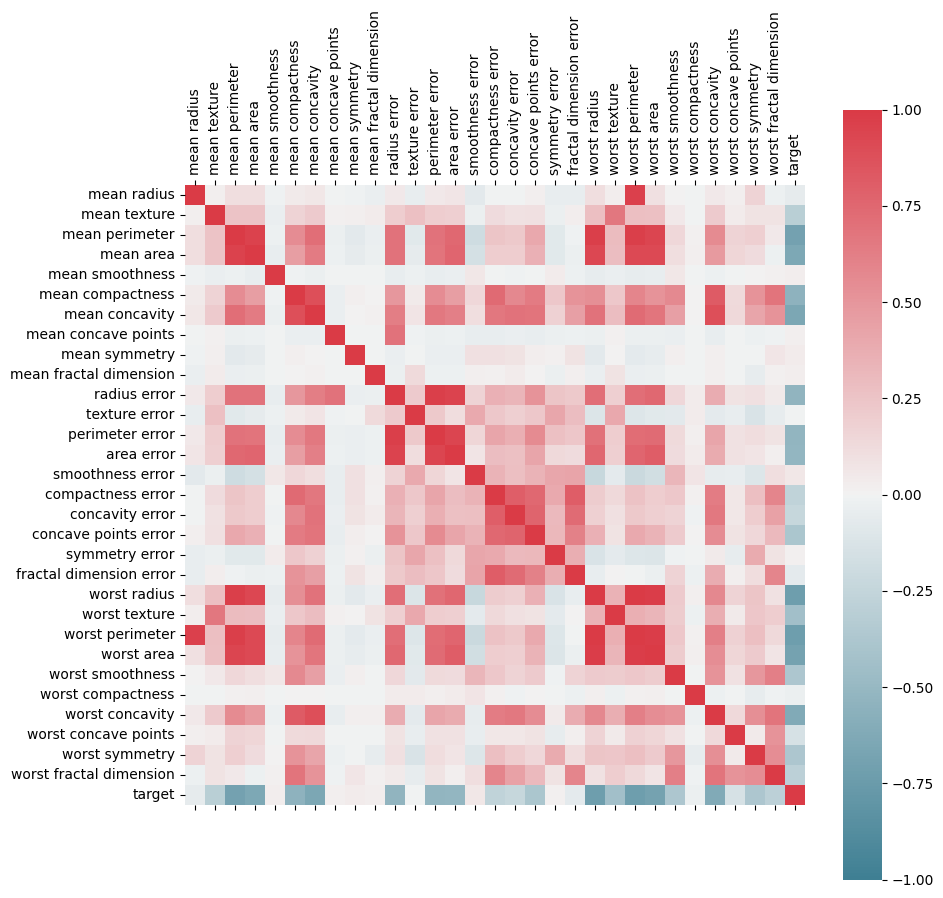

In [ ]:
# Representación visual de cómo las variables se relacionan entre sí
corr = df_cancer.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
plt.show()

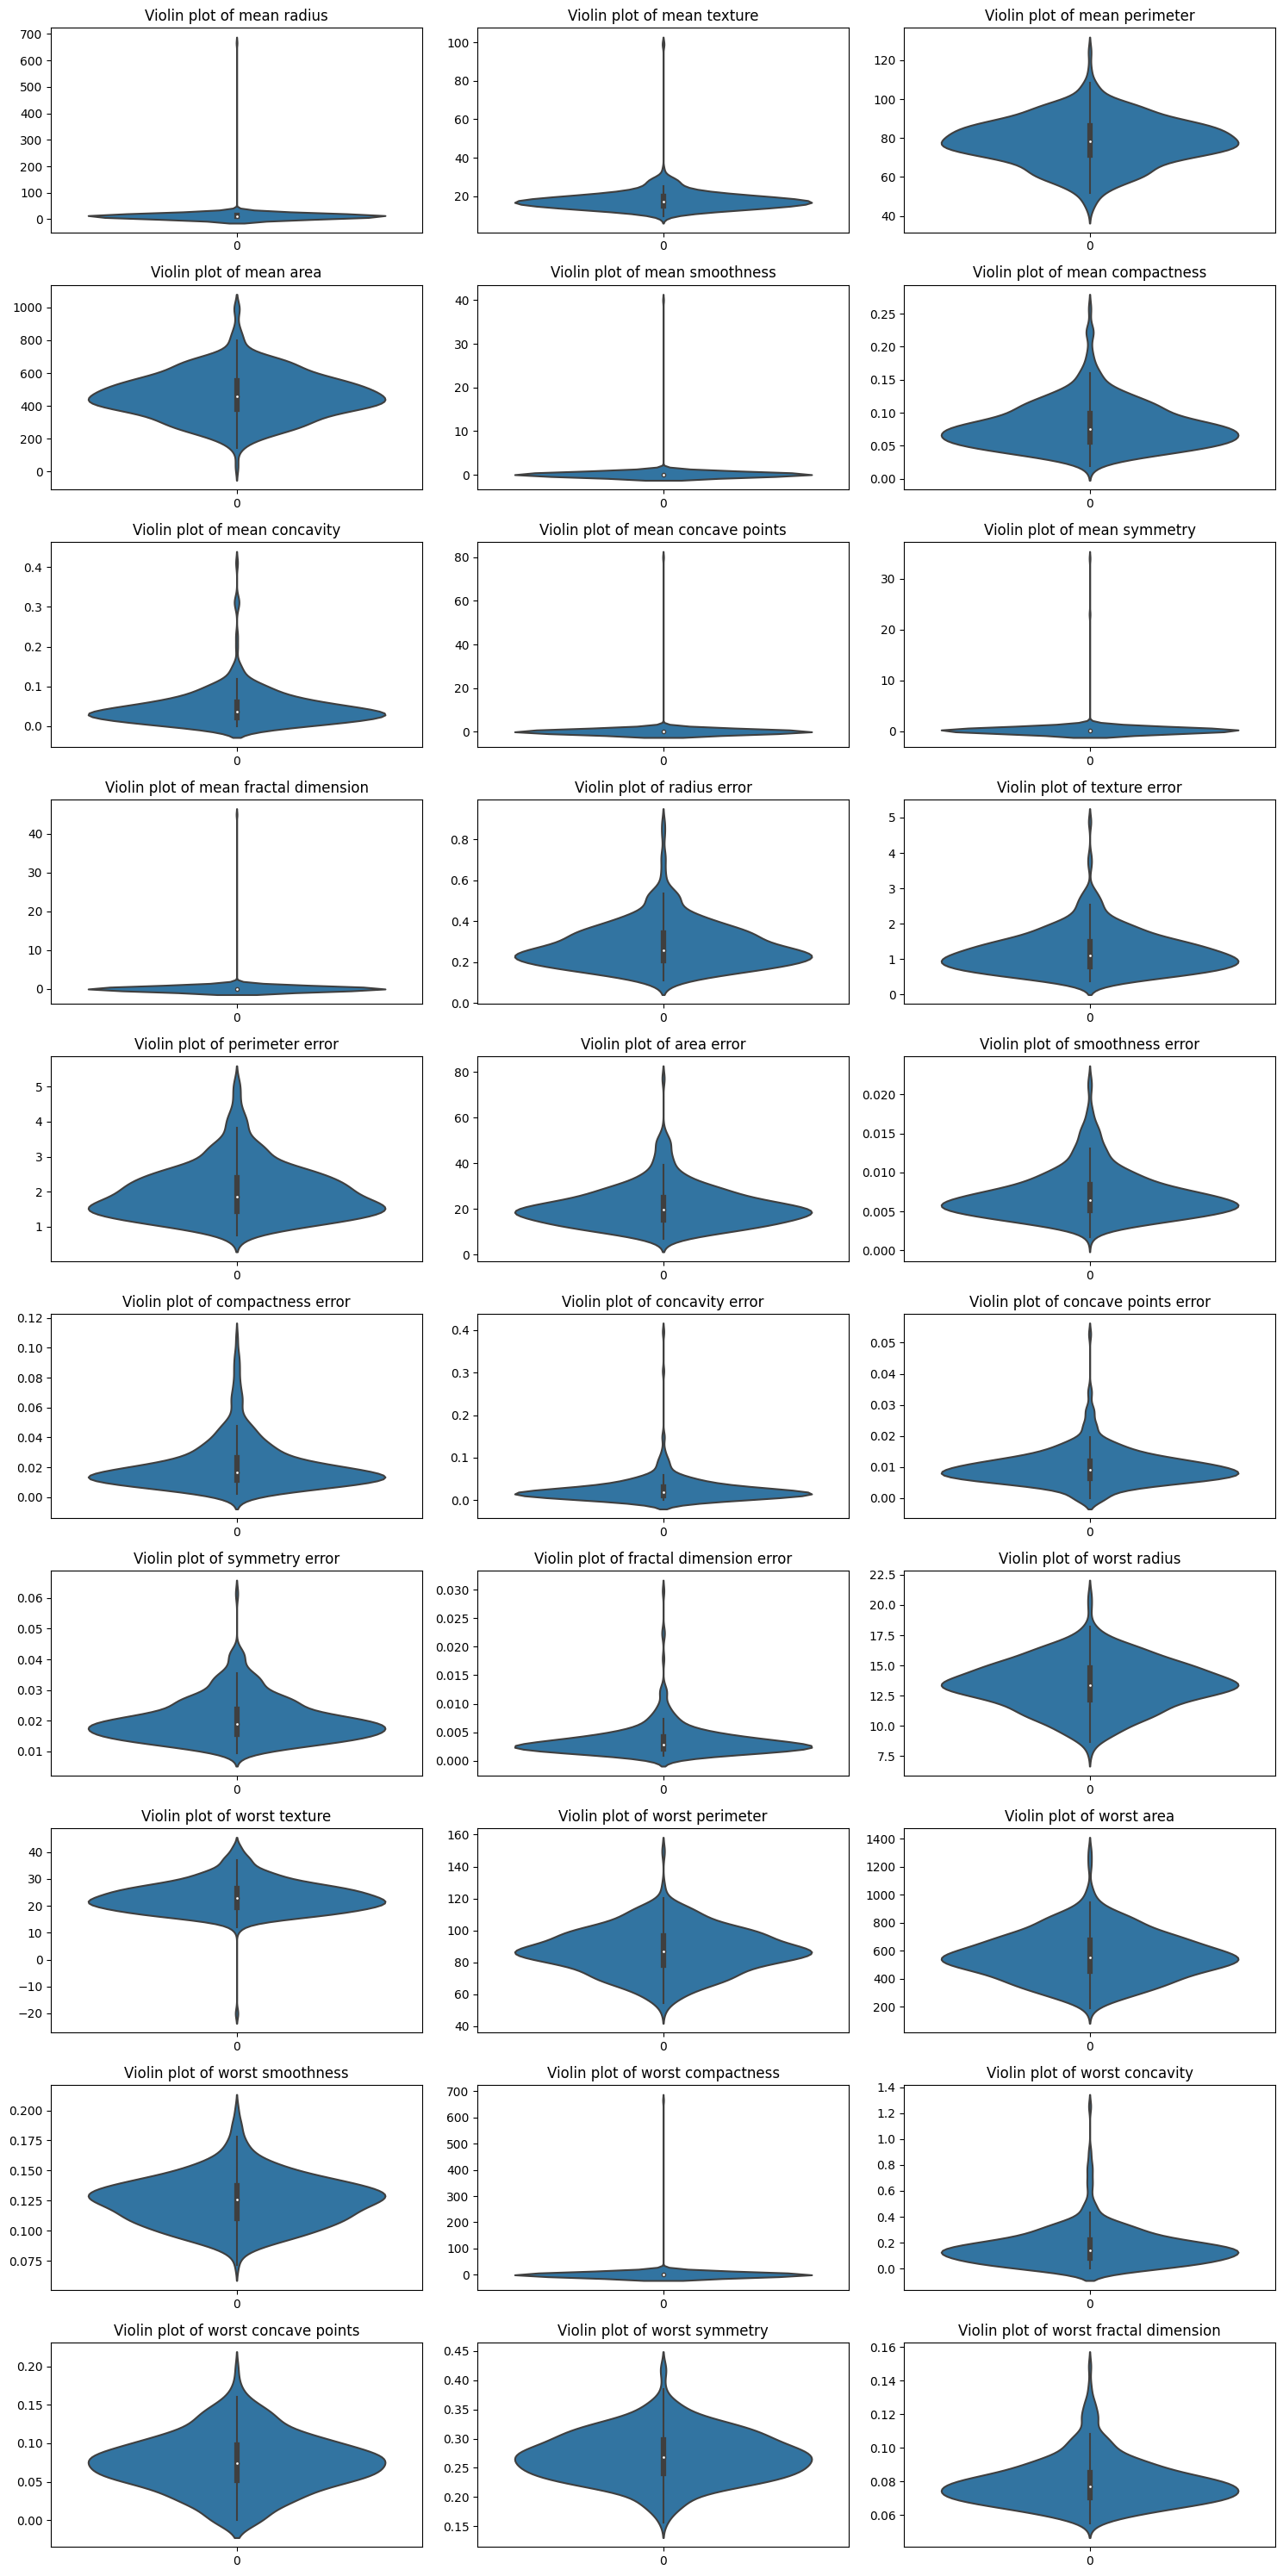

In [ ]:
# Ploteo de gráfico de violín para cada variable
plt.figure(figsize=(15,30))
count = 1
for feature in titles:
    plt.subplot(10, 3, count)
    sns.violinplot(patients[feature].tolist())
    plt.title(('Violin plot of ' + feature))
    count += 1

plt.tight_layout()
plt.show()

# Pre-procesamiento

5) Haz el análisis exploratorio de la data (graficos, análisis de rangos y datos extremos, etc). Comenta en base a las gráficas que datos no son viables clinicamente.

Como se puede ver en los gráficos, el hecho de que hayan outliers o valores atípicos, deforma totalmente algunos gráficos. Como por ejemplo, en el histograma, un valor atípico demasiado alto produce que los demás se concentren en la parte izquierda del eje y, por lo que no proporcionan una información detallada debido a la escala. De igual manera, en el gráfico de caja y bigotes, los valores atípicos se encuentran tan alejados de la caja, que en algunos casos no es posible generar el gráfico. Finalmente, en el gráfico de violín, los outliers producen un estiramiento hacia la parte superior, que generan que la parte más densa del violín se vea aplanada hasta casi una línea y no se represente correctamente los demás valores.

En base a un análisis de las gráficas para cada una de las variables, se pudo determinar que los problemas previamente mencionados se presentan con mayor incidencia en los siguientes parámetros: *mean radius, mean texture, mean smoothness, mean concave points, mean symmetry, mean fractal dimension, perimeter error, area error, concavity error, symmetry error, concave points error, fractal dimension error, worst perimeter, worst texture, worst compactness, worst concave points* y *worst fractal dimension*.

Tras una revisión de cada uno de las variables en el archivo original, se encontraron ciertas irregularidades en los valores, lo cual podría contribuírse a errores de medición o calibración debido a que difieren demasiado del común, es por esto que se considerarían como no viables clínicamente.

6) Ejecuta la limpieza de datos según el criterio analizado previamente. Evalua la cantidad de datos crudos vs la cantidad de datos que quedan posterior a la limpieza.

In [ ]:
print('Data size before cleaning: ', len(df_cancer))
df_cancer_clean = df_cancer[(df_cancer['mean radius'] < 30) & (df_cancer['mean texture'] < 40) & (df_cancer['mean smoothness'] < 1) &
                 (df_cancer['mean concave points'] < 0.3) & (df_cancer['mean symmetry'] < 0.4) & (df_cancer['mean fractal dimension'] < 1) & (df_cancer['perimeter error'] < 12) &
                 (df_cancer['area error'] < 240) & (df_cancer['concavity error'] < 0.12) & (df_cancer['symmetry error'] < 0.06) & (df_cancer['fractal dimension error'] < 0.015) &
                 (df_cancer['worst perimeter'] < 130) & (df_cancer['worst compactness'] < 1.1) & (df_cancer['worst concave points'] < 0.3) & (df_cancer['worst fractal dimension'] < 0.15)]
df_cancer_clean = df_cancer_clean.dropna() # Para eliminar las filas sin datos (null)
print('Data size after cleaning: ', len(df_cancer_clean))

Data size before cleaning:  569
Data size after cleaning:  393


In [ ]:
# Comprobamos la eliminación de valores nulos
print(df_cancer_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 5 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              393 non-null    float64
 1   mean texture             393 non-null    float64
 2   mean perimeter           393 non-null    float64
 3   mean area                393 non-null    float64
 4   mean smoothness          393 non-null    float64
 5   mean compactness         393 non-null    float64
 6   mean concavity           393 non-null    float64
 7   mean concave points      393 non-null    float64
 8   mean symmetry            393 non-null    float64
 9   mean fractal dimension   393 non-null    float64
 10  radius error             393 non-null    float64
 11  texture error            393 non-null    float64
 12  perimeter error          393 non-null    float64
 13  area error               393 non-null    float64
 14  smoothness error         3

7) Vuelve a utilizar gráficas para evaluar los datos limpios. Comenta tus resultados.

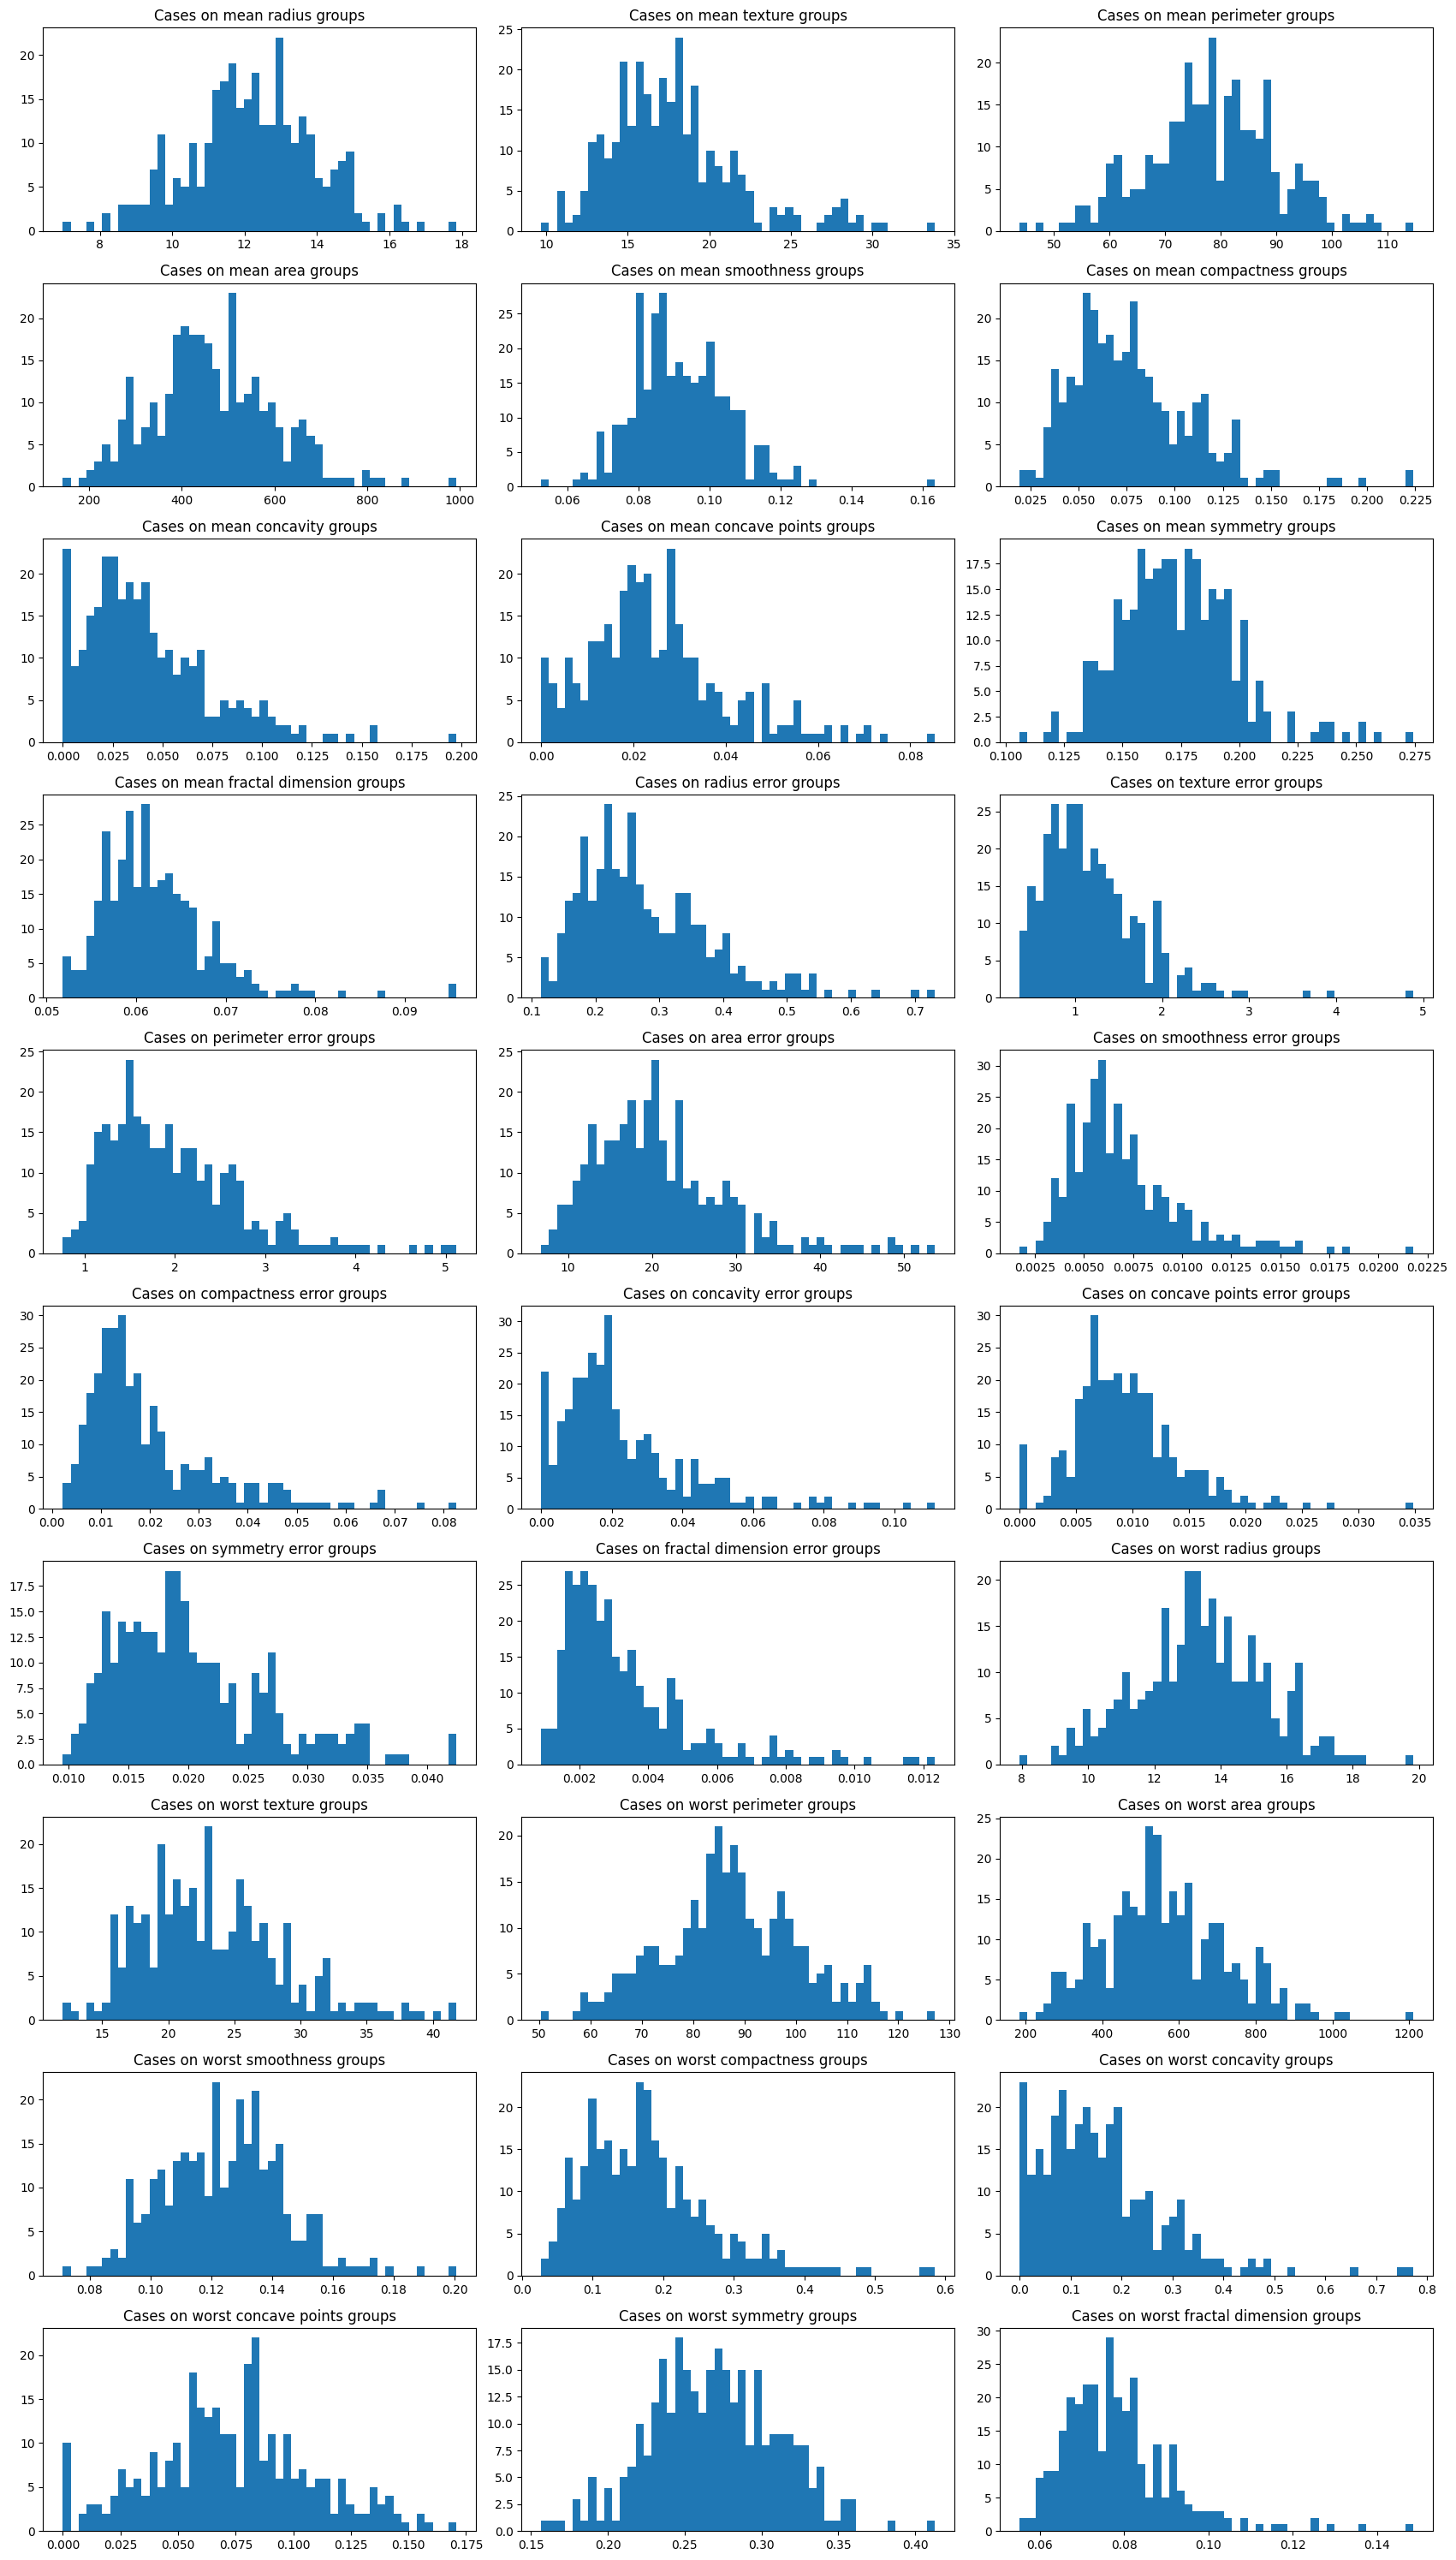

In [ ]:
patients2 = df_cancer_clean[df_cancer_clean['target'] == 1]
plt.figure(figsize=(17,30))
count = 1
# Ploteo de un histograma para cada una de las características
for feature in titles:
    plt.subplot(10, 3, count)
    plt.hist(patients2[feature], bins=50)
    plt.title(('Cases on ' +  feature + ' groups'))
    # plt.grid()
    count += 1

plt.tight_layout()
plt.show()

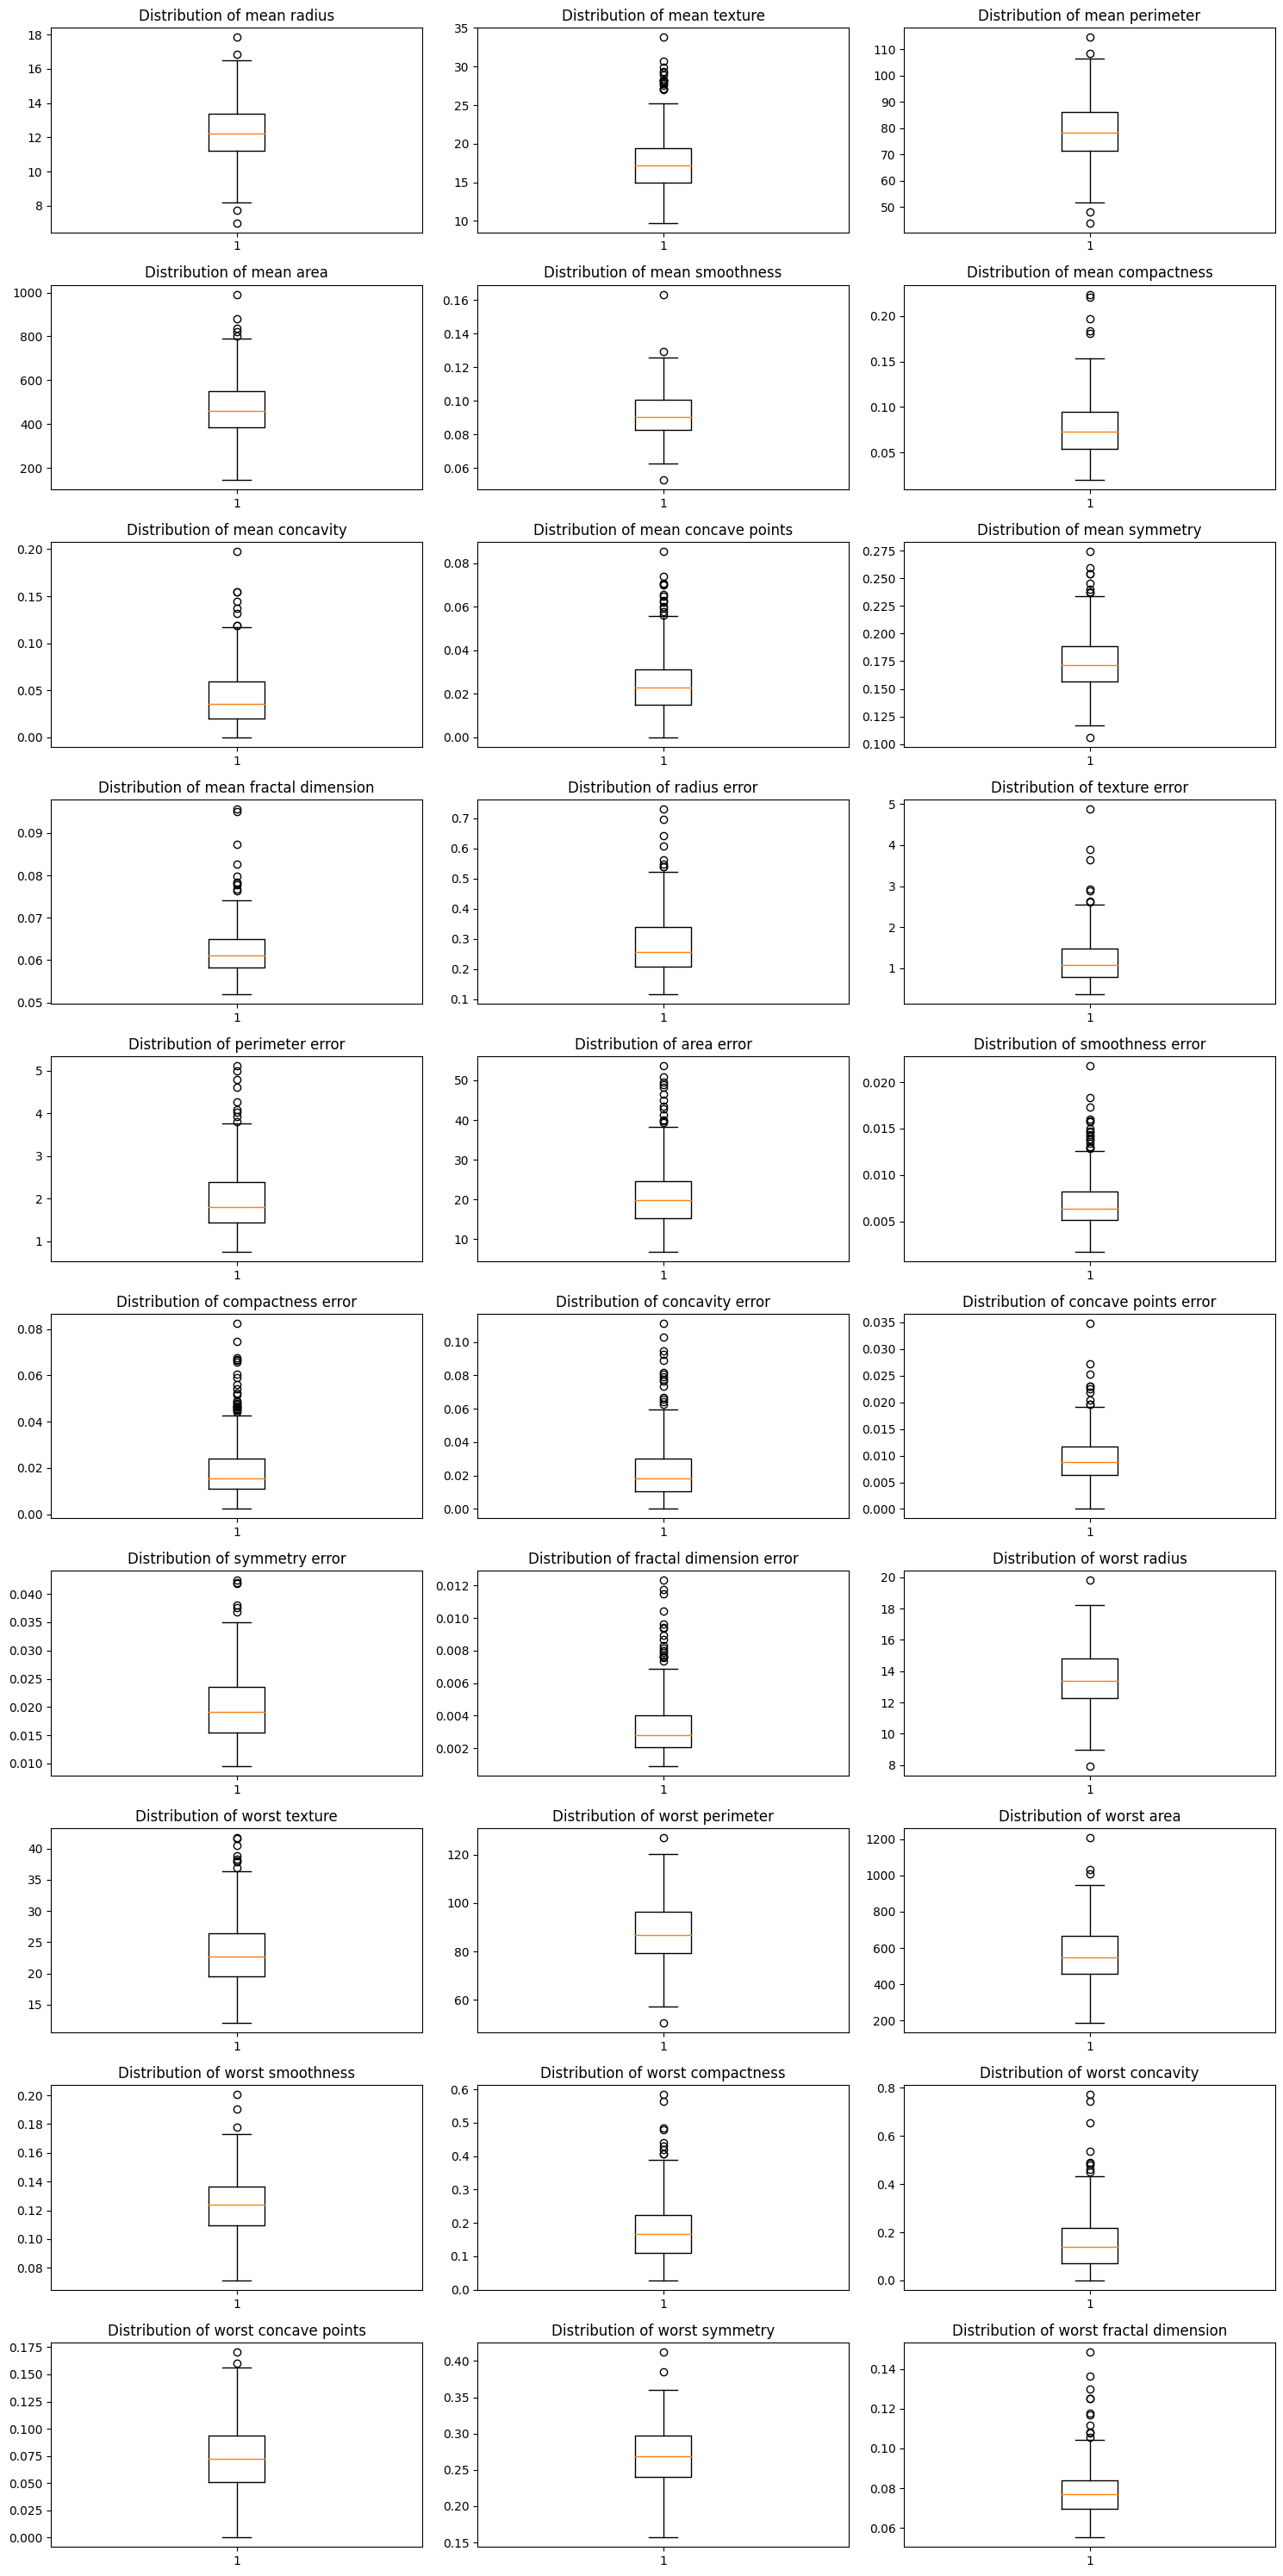

In [ ]:
# Ploteo de gráfico de caja y bigotes para cada variable
plt.figure(figsize=(15,30))
count = 1
for feature in titles:
    plt.subplot(10, 3, count)
    plt.boxplot(patients2[feature])
    plt.title(('Distribution of ' + feature))
    count += 1

plt.tight_layout()
plt.show()

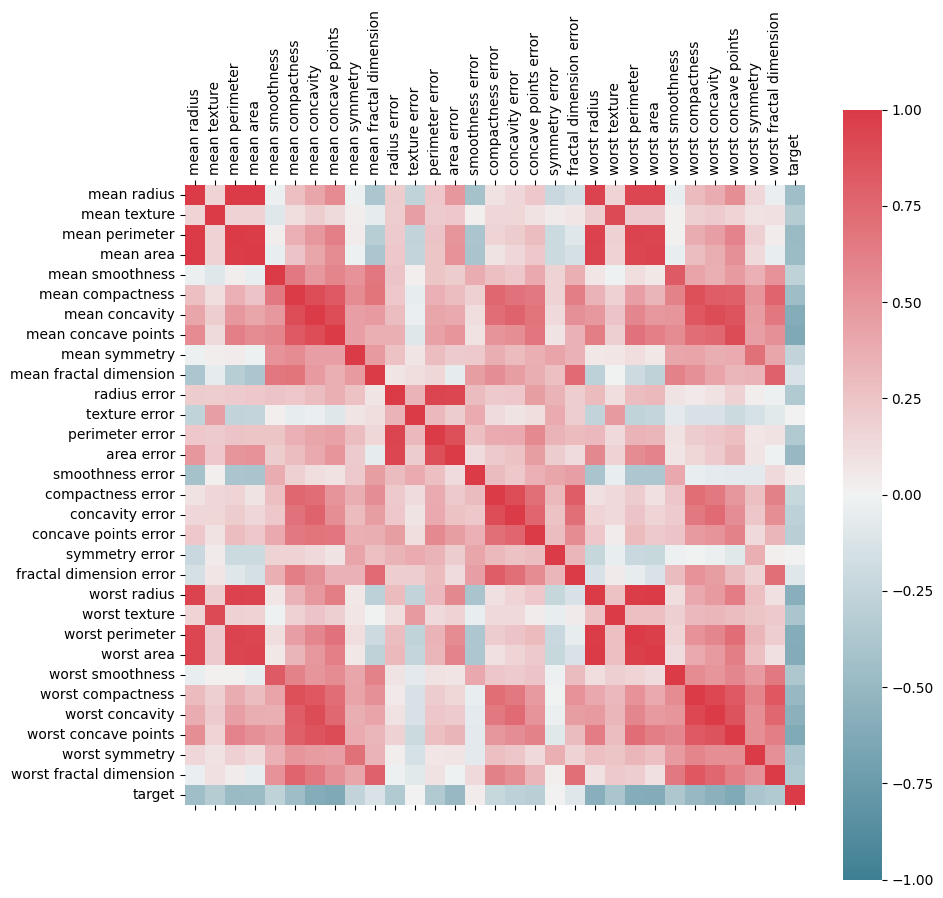

In [ ]:
# Representación visual de cómo las variables se relacionan entre sí
corr = df_cancer_clean.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
plt.show()

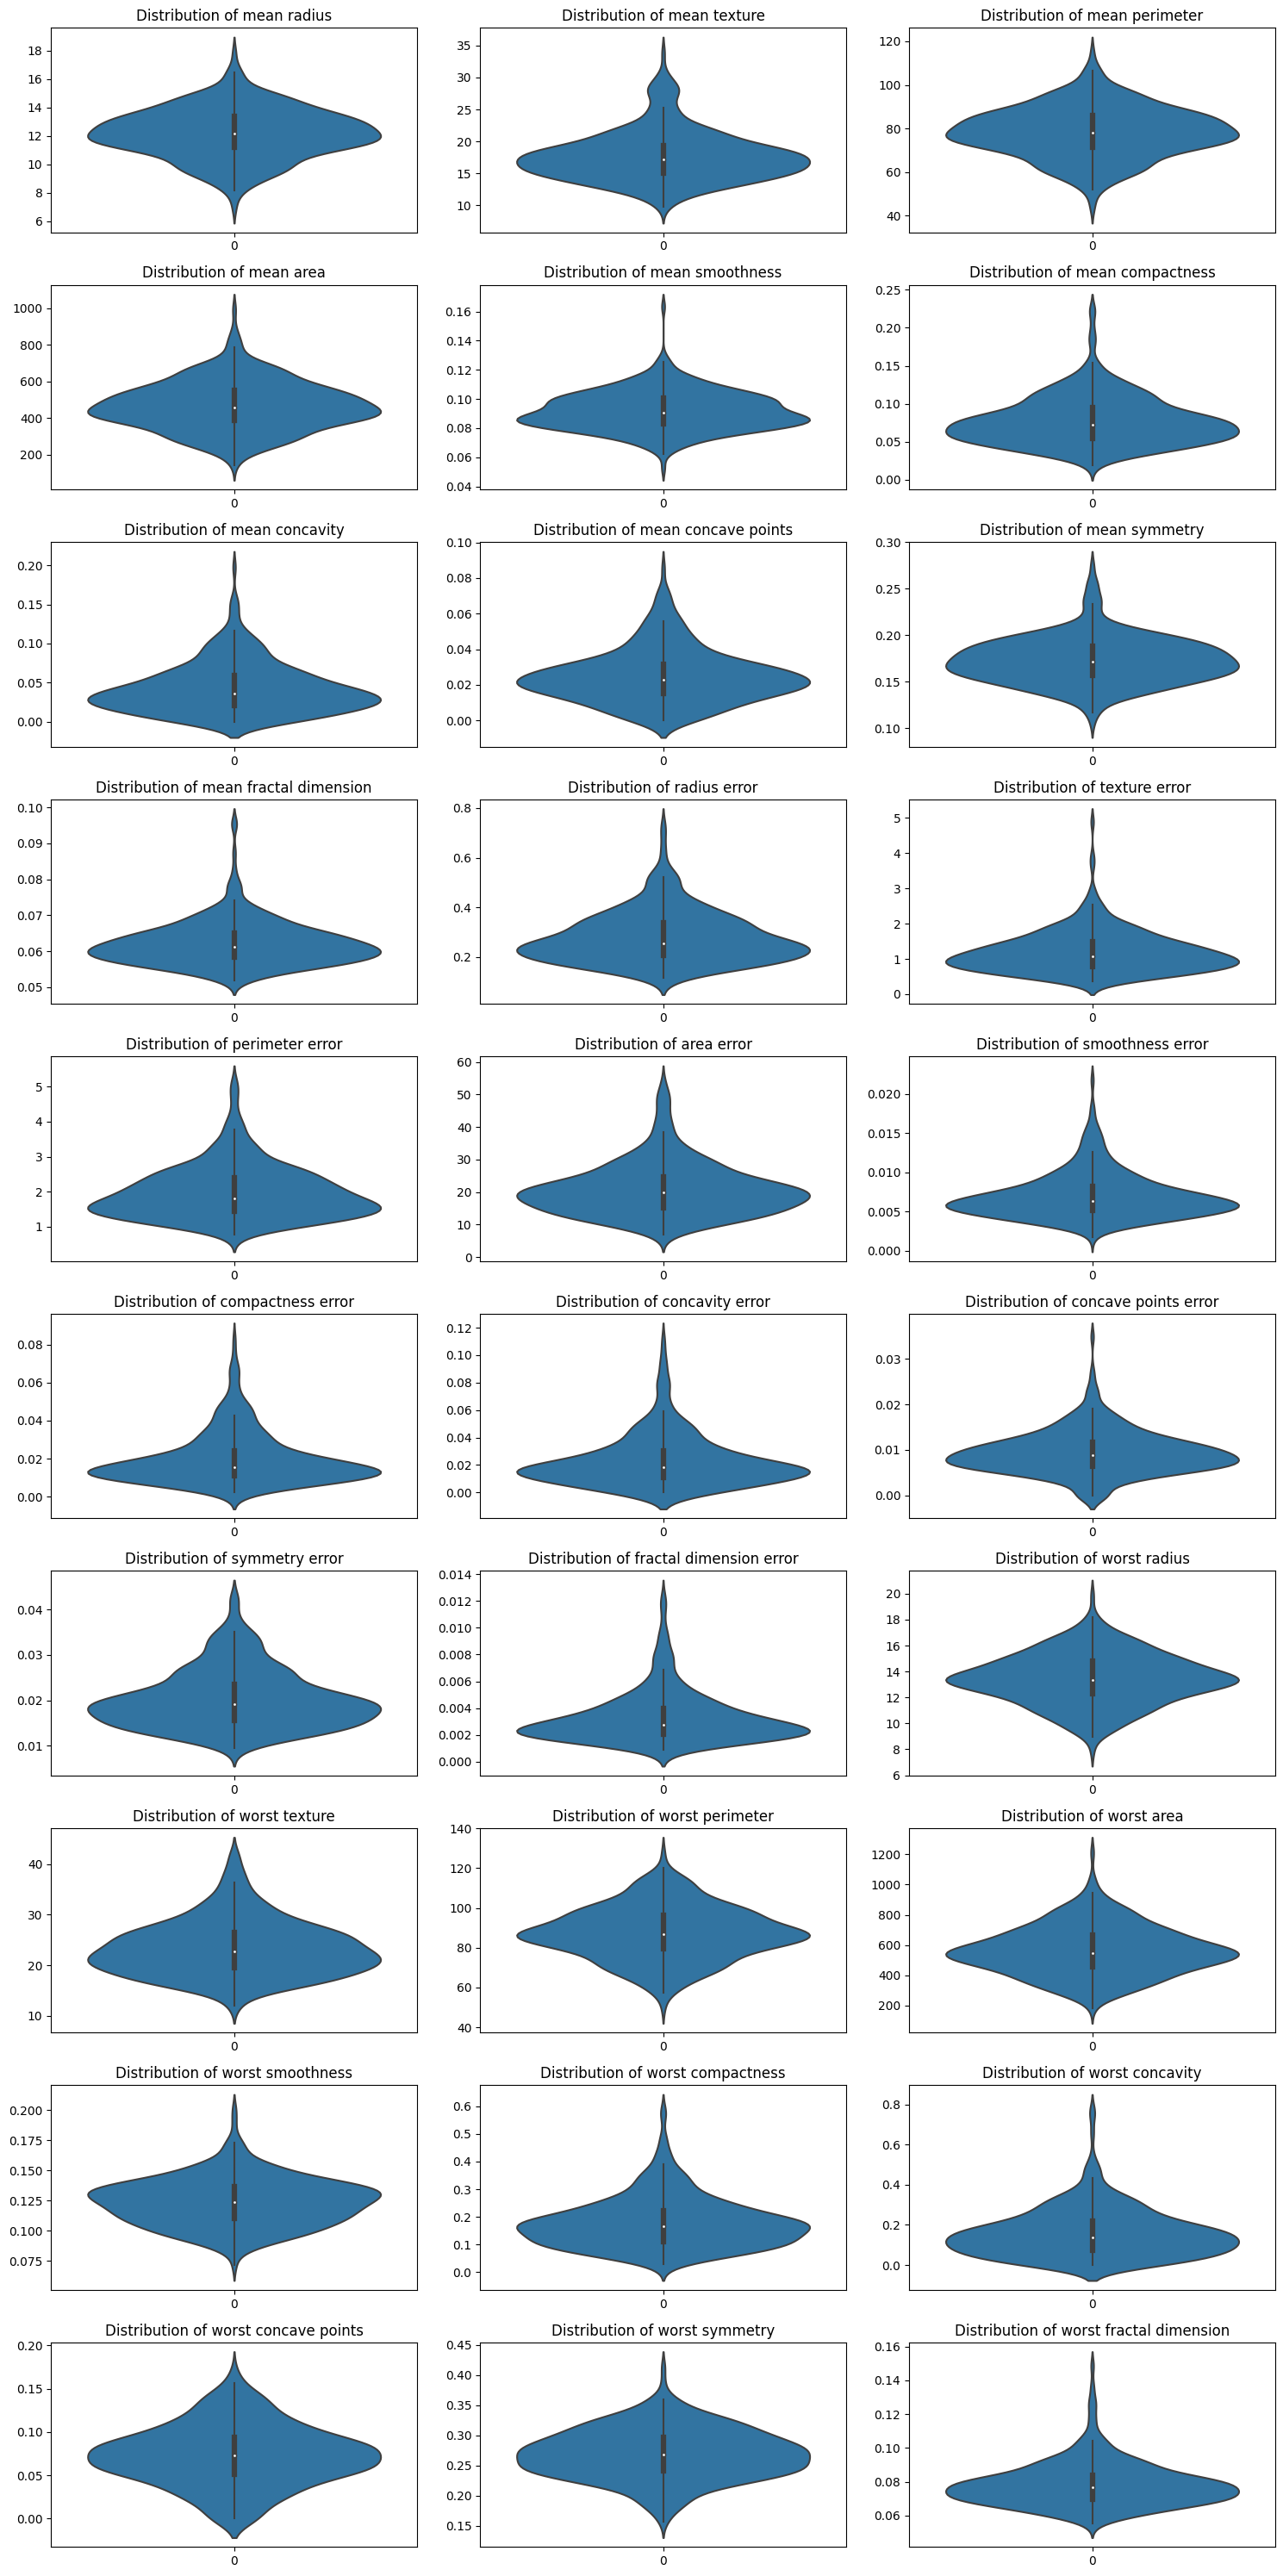

In [ ]:
# Ploteo de gráfico de violín para cada variable
plt.figure(figsize=(15,30))
count = 1
for feature in titles:
    plt.subplot(10, 3, count)
    sns.violinplot(patients2[feature].tolist())
    plt.title(('Distribution of ' + feature))
    count += 1

plt.tight_layout()
plt.show()

Como se puede ver, tras haber realizado la limpieza de datos ocurrieron los siguientes cambios en las represnetaciones visuales:
* En el histograma, el rango de valores en el eje x se acortó y la distribución se concentra en un rango más estrecho, asemejandose a una distribución normal para muchas de las variables.

* En el gráfico de caja y bigotes, los bigotes se redujeron en longitud debido a la disminución de los valores extremos de las variables

* El gráfico de Violín es más estrecho y uniforme a lo largo del eje x, y las áreas más densas son más evidentes y tienen forma más definidas debido a la reducción de los picos extremos.

En general, después de haber tratado los outliers y conservar una data más estandarizada, hay una mejor visualización en los 3 tipos de gráficos, principalmente en la distribución de las variables que se vieron afectadas previamente.

# Procesamiento y Modelamiento

8) Propón un método predictivo para la data evaluada. Comenten sus resultados
**Hint: **Leer la documentación de la libreria lazypredict

In [ ]:
!gdown https://drive.google.com/uc?id=1KcIESuPAZilpnDAPKStt12g-KC3xpJcy

!pip -q install lazypredict

Downloading...
From: https://drive.google.com/uc?id=1KcIESuPAZilpnDAPKStt12g-KC3xpJcy
To: /content/cancer_challenge_cl2.csv
100% 123k/123k [00:00<00:00, 43.3MB/s]


In [ ]:
from sklearn.preprocessing import StandardScaler # Para realizar la normalización de características.

scaler = StandardScaler()

X = df_cancer_clean.drop(['target'], axis=1)
y = df_cancer_clean['target']

data_normalized = scaler.fit_transform(X) # Transformación de escala

# Convertir el resultado a un nuevo dataframe con los datos ya normalizados
X = pd.DataFrame(data_normalized, columns=X.columns)

In [ ]:
from sklearn.model_selection import train_test_split # Para dividir los datos en conjuntos de entrenamiento y prueba.
from lazypredict.Supervised import LazyClassifier # Genera modelos de clasificación

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =123, test_size=0.2) # Divide en datos de prueba y entrenamiento
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

# Evalua algoritmos de clasificación y proporciona una lista de modelos junto con las métricas de rendimiento estimadas.
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models


 90%|████████▉ | 26/29 [00:00<00:00, 28.19it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3131
[LightGBM] [Info] Number of data points in the train set: 314, number of used features: 30
[LightGBM] [Info] Start training from score -1.559738
[LightGBM] [Info] Start training from score -0.240005
[LightGBM] [Info] Start training from score -5.749393
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

100%|██████████| 29/29 [00:01<00:00, 22.53it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.97,0.96,0.96,0.97,0.03
Perceptron,0.96,0.95,0.95,0.96,0.02
SGDClassifier,0.96,0.93,0.93,0.96,0.04
GaussianNB,0.92,0.93,0.93,0.93,0.01
BaggingClassifier,0.95,0.92,0.92,0.95,0.05
SVC,0.96,0.91,0.91,0.96,0.04
RidgeClassifierCV,0.96,0.91,0.91,0.96,0.02
LinearSVC,0.95,0.90,0.90,0.95,0.06
KNeighborsClassifier,0.95,0.90,0.90,0.95,0.01


De acuerdo a los resultados obtenidos usando LazyPredict, se propondría el método LogisticRegression, pues tiene una mayor precisión y ROC -  *que representa la tasa de verdaderos positivos (sensibilidad) frente a la tasa de falsos positivos (1 - especificidad) a medida que se varía el umbral de clasificación*. Además, el tiempo empleado para entrenar y evaluar cada modelo es relativamente corte; sin embargo, de ser necesario un menor tiempo de procesamiento, el método Perceptron también sería una alternativa viable.